# Домашняя работа

1. Сделайте краткий обзор любой статьи, посвященной тому или иному алгоритму для object detection, который не рассматривался на уроке. Проведите анализ: Чем отличается выбранная вами на рассмотрение архитектура нейронной сети от других архитектур? В чем плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при применении данной архитектуры на практике?

Scaled YOLO v4 является самой лучшей нейронной сетью для обнаружения объектов — самой точной нейронной сетью (55.8% AP) на датасете Microsoft COCO среди всех опубликованных нейронных сетей на данный момент. А также является лучшей с точки зрения соотношения скорости к точности во всем диапазоне точности и скорости от 15 FPS до 1774 FPS. На данный момент это Top1 нейронная сеть для обнаружения объектов.

Scaled YOLO v4 обгоняет по точности нейронные сети:

- Google EfficientDet D7x / DetectoRS or SpineNet-190 (self-trained on extra-data)

- Amazon Cascade-RCNN ResNest200

- Microsoft RepPoints v2

- Facebook RetinaNet SpineNet-190

Кроме того, подходы YOLO v4 являются лучшими с точки зрения как абсолютной точности, так и соотношения точности к скорости.

Минусы YOLO v4:
- Не всегда лучшая сеть для классификации объектов будет лучшей в качестве backbone для сети, используемой для обнаружения объектов.

- Использование weights обученных с фичами, которые увеличили точность в классификации, может негативно сказаться на точности детектора (на некоторых сетях).

- Не все фичи улучшают точность сети.

- Не все фичи совместимы между собой и некоторые комбинации фич зачастую уменьшают точность сети при использовании совместно.

2. Запустите детектор (ssdMobile_v2 или faster_rcnn, или любой другой детектор) для своей картинки и попробуйте найти 10 объектов, 100 объектов.

# OpenCV - Selectiv Search

In [1]:
#Импорт всего

# Currently %tensorflow_version 2.x installs beta1, which doesn't work here.
# %tensorflow_version can likely be used after 2.0rc0  
#!pip install tf-nightly-gpu-2.0-preview
#!pip install tf-nightly-gpu-2.0-preview
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow

import tensorflow as tf

# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time
%matplotlib inline

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

The following GPU devices are available: 


In [2]:
from google.colab import files

In [3]:
import cv2 as cv

Загрузим картинку

In [4]:
files.upload()

Saving corgi.png to corgi (2).png


{'corgi.png': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x07\x07\x07\x07\x07\x07\x0c\x07\x07\x0c\x11\x0c\x0c\x0c\x11\x17\x11\x11\x11\x11\x17\x1e\x17\x17\x17\x17\x17\x1e$\x1e\x1e\x1e\x1e\x1e\x1e$$$$$$$$++++++222228888888888\xff\xdb\x00C\x01\t\t\t\x0e\r\x0e\x19\r\r\x19;(!(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc2\x00\x11\x08\x048\x048\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x01\x02\x04\x05\x06\x07\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xe7\xe9\x97w~|r[\xa4\xd6pn\xe7\xad\t\xab\x99\xd0\x88C\xe8\xb0L\xf3\xc2\x1a\xa6\xb7\xc5\x0b"\xe878\xb4\xe7\xbb~,Rw\\}Z\x05Q\x94g:2v\x04\xec\xe0\x92@\xee\xce%(\xc9\x8f(\xc9\xa9<\\\x1e2\x88\x04\x83 \xca\xec\xee{\xee\xbf\x8c\xec\xe0\x94\xa3$\xd2H\x12H\x13;\x02d\x83?\x9f\xe8\xb9\xdc\xf4

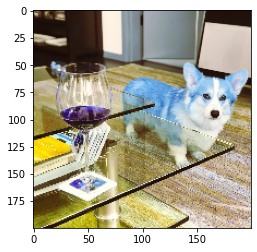

In [5]:
#Читаем картинку
im = cv.imread('/content/corgi.png')
    
# размеры изображения
newH = 200  #высота
newW = int(im.shape[1]*200/im.shape[0]) # ширина 
#сжатая картинка
im = cv.resize(im, (newW, newH)) 
#Выводим 

plt.imshow(im)
plt.show()

Selective Search(селективный поиск)

In [6]:
#Настройка модели
cv.setUseOptimized(True) #режим оптимизации
cv.setNumThreads(6)      #количество потоков

In [7]:
# Объект Selective Search Segmentation
sss = cv.ximgproc.segmentation.createSelectiveSearchSegmentation()

# запускаем с картинкой
sss.setBaseImage(im)
  
# Выбираем точный метод 
sss.switchToSelectiveSearchQuality()

# Делаем selective search segmentation 
rects = sss.process() 
#вернёт массив прямоугольников, гдевозможно что-то есть
print(rects.shape) #число найденых объектов

(2036, 4)


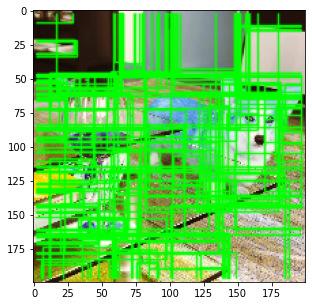

In [8]:
#Построим области

num_Rects = 200 #число выводимых region proposals (прямоугольников)

#создаем копию исходной картинки
im_ = im.copy()

for i, rect in enumerate(rects): 
  if (i < num_Rects): #пока не больше 
    # x,y - координаты левого верхнего угла; w, h - ширина и высота области
    x, y, w, h = rect
    # рисуем рамку      
    cv.rectangle(im_, (x, y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA) 
  else: 
    break 

# Рисуем на экран
plt.figure(figsize=(16,5))
plt.imshow(im_) 
plt.show()

https://github.com/opencv/opencv/tree/master/data/haarcascades

Запишем маршрут, где есть что-нибудь для чтения (последовательность из нескольких фотографий )



In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# root_path = './' #change dir to your project folder 

root_path = '/content/drive/My Drive/Colab Notebooks/' #change dir to your project folder 

## **Формирование и обработка результатов детектирования**


Запишем основные функции из примера TensorFlow (https://github.com/tensorflow/hub/blob/master/examples/colab/object_detection.ipynb) и адаптируем их для своих целей

In [11]:
# выводит картинку
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

#  Грузим и обрабатываем картинку
def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  #read image
  image_data = BytesIO(image_data)
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)
  #print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

#  Рисуем рамку на изображении
def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  """Adds a bounding box to an image."""
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  # If the total height of the display strings added to the top of the bounding
  # box exceeds the top of the image, stack the strings below the bounding box
  # instead of above.
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = bottom + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

#  Рисуем все рамки
# max_boxes - максимальное число объектов для отображения, min_score=0.01 - минимакльная точность их детекции
# можно менять

def draw_boxes(image, boxes, class_names, scores, max_boxes=3, min_score=0.01):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

Загрузка детектора

In [12]:
# справа в списке выбора можно поменять архитектуру на SSD или Faster F-CNN
module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1" #@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]

detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Формируем тензор

In [13]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)  # алгоритм кодирования JPEG
  return img

### Выполняем детектор на 100 рамок

In [14]:
max_frames = 100
def run_detector(detector, path):
  img = load_img(path)
  # превращаем изображение из целого в вещественное
  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()
  #print(result['detection_scores'])
  result = {key:value.numpy() for key,value in result.items()} 
  
  # визуализация. Ограничиваем количество рамок 100
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"], max_boxes=max_frames)

  display_image(image_with_boxes)
  return result

Возвращаем рамки для объектов

In [15]:
#  Найдем рамку
# max_boxes - максимальное число объектов для отображения, min_score=0.0 - минимакльная точность их детекции
# можно менять
def get_bounding_box_on_image(image, boxes, class_names, scores, max_boxes=max_frames, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  if len(image.shape)>3:
    image=image.reshape(image.shape[-3],image.shape[-2],image.shape[-1])
  I_shape=np.uint8(image).shape
  #print(I_shape)
  im_array=[]
  for i in range(min(boxes.shape[0], max_boxes)): 
    #print(tuple(boxes[i]))
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])


      yminI = np.int(ymin*I_shape[0])
      ymaxI = np.int(ymax*I_shape[0])
      xminI = np.int(xmin*I_shape[1])
      xmaxI = np.int(xmax*I_shape[1])
      imf = np.array(image)[yminI:ymaxI,xminI:xmaxI,:]
      #print(imf.shape,imf[0,0,:])
      
      im_array.append(imf.copy())  
  return im_array

In [16]:
#  Вернем рамки
def get_boxes(image, boxes, class_names, scores, max_boxes=max_frames, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
 
  image_pil = np.array(image)
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      
      imf= get_bounding_box_on_image(image_pil, boxes, class_names, scores, max_boxes=max_boxes, min_score=0.1)
     
  return imf

Чтение имен кадров 

In [17]:
import os, fnmatch
listOfFiles = os.listdir(root_path)
pattern = '*.png'
List_name=[]
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
            List_name.append(np.array(root_path+entry))
List_name[0]

array('/content/drive/My Drive/Colab Notebooks/corgi.png', dtype='<U49')

In [18]:
List_name[0]

array('/content/drive/My Drive/Colab Notebooks/corgi.png', dtype='<U49')

Проверяем детектор

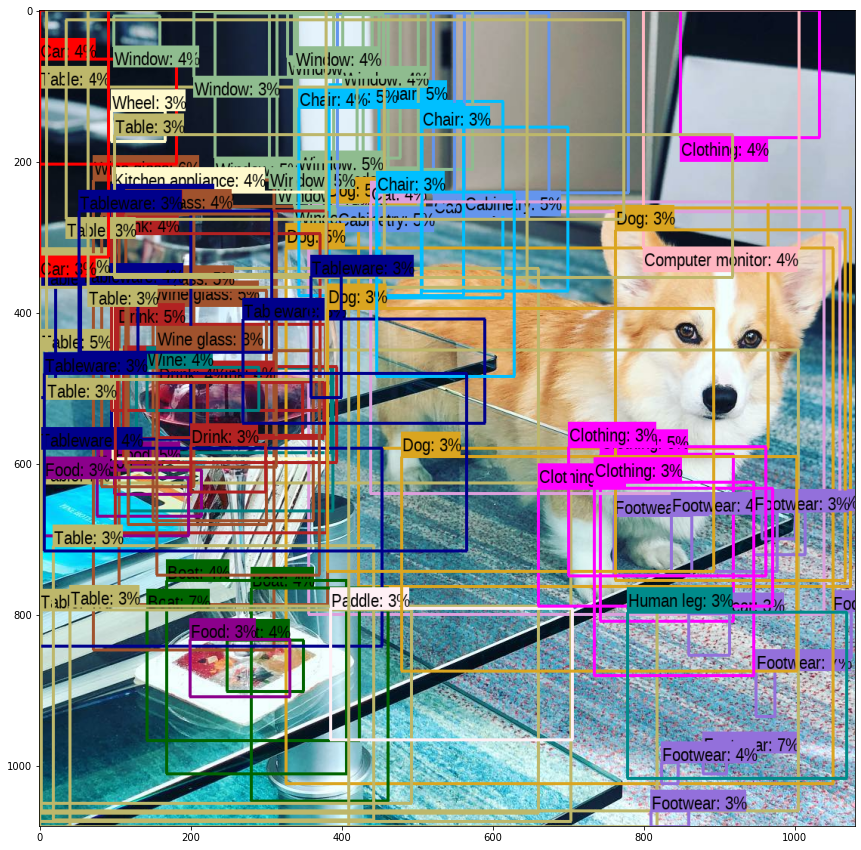

In [19]:
result_100 = run_detector(detector, List_name[2])

In [20]:
result_100

{'detection_boxes': array([[2.42767051e-01, 3.91600698e-01, 7.05704510e-01, 9.95324492e-01],
        [4.39795226e-01, 1.19425386e-01, 5.41840613e-01, 3.58662039e-01],
        [2.47751638e-01, 3.30009550e-01, 7.39999294e-01, 9.62194324e-01],
        [2.40985125e-01, 9.72319692e-02, 7.28120923e-01, 3.54306638e-01],
        [4.56620812e-01, 1.45454049e-01, 5.23614109e-01, 3.23324978e-01],
        [3.85375023e-01, 9.54213291e-02, 5.24786770e-01, 3.51014733e-01],
        [3.62589210e-01, 1.39623091e-01, 6.25724673e-01, 3.36307943e-01],
        [3.17490250e-01, 0.00000000e+00, 9.83786106e-01, 6.12612963e-01],
        [1.28789246e-03, 2.91194737e-01, 2.13288829e-01, 4.27913189e-01],
        [5.80369949e-01, 0.00000000e+00, 9.94055271e-01, 6.51886284e-01],
        [9.10502255e-01, 8.13756824e-01, 9.35864031e-01, 8.43498468e-01],
        [3.43974769e-01, 1.09005257e-01, 6.29941285e-01, 2.79161274e-01],
        [4.55633551e-01, 2.05689892e-01, 5.21286249e-01, 3.49288046e-01],
        [7.35792220

### Выполняем детектор на 50 рамок

In [21]:
max_frames = 50
def run_detector(detector, path):
  img = load_img(path)
  # превращаем изображение из целого в вещественное
  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()
  #print(result['detection_scores'])
  result = {key:value.numpy() for key,value in result.items()} 
  
  # визуализация. Ограничиваем количество рамок 50
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"], max_boxes=max_frames)

  display_image(image_with_boxes)
  return result

Возвращаем рамки для объектов

In [22]:
#  Найдем рамку
# max_boxes - максимальное число объектов для отображения, min_score=0.0 - минимакльная точность их детекции
# можно менять
def get_bounding_box_on_image(image, boxes, class_names, scores, max_boxes=max_frames, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  if len(image.shape)>3:
    image=image.reshape(image.shape[-3],image.shape[-2],image.shape[-1])
  I_shape=np.uint8(image).shape
  #print(I_shape)
  im_array=[]
  for i in range(min(boxes.shape[0], max_boxes)): 
    #print(tuple(boxes[i]))
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])


      yminI = np.int(ymin*I_shape[0])
      ymaxI = np.int(ymax*I_shape[0])
      xminI = np.int(xmin*I_shape[1])
      xmaxI = np.int(xmax*I_shape[1])
      imf = np.array(image)[yminI:ymaxI,xminI:xmaxI,:]
      #print(imf.shape,imf[0,0,:])
      
      im_array.append(imf.copy())  
  return im_array

In [23]:
#  Вернем рамки
def get_boxes(image, boxes, class_names, scores, max_boxes=max_frames, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
 
  image_pil = np.array(image)
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      
      imf= get_bounding_box_on_image(image_pil, boxes, class_names, scores, max_boxes=max_boxes, min_score=0.1)
     
  return imf

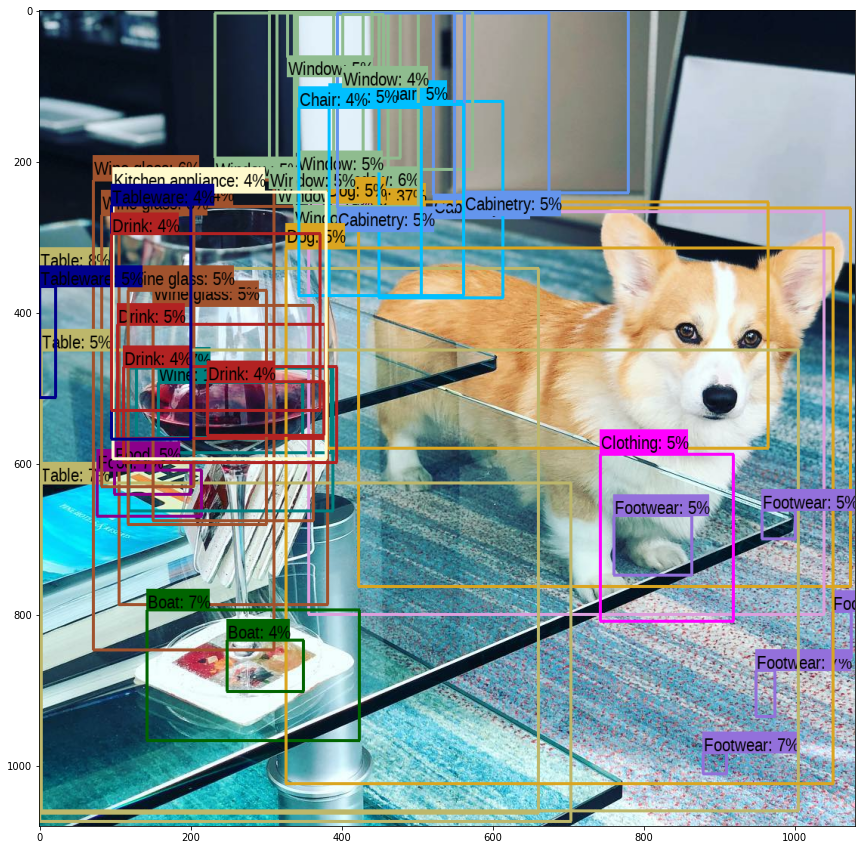

In [25]:
result_50 = run_detector(detector, List_name[0])

In [26]:
result_50

{'detection_boxes': array([[2.42767051e-01, 3.91600698e-01, 7.05704510e-01, 9.95324492e-01],
        [4.39795226e-01, 1.19425386e-01, 5.41840613e-01, 3.58662039e-01],
        [2.47751638e-01, 3.30009550e-01, 7.39999294e-01, 9.62194324e-01],
        [2.40985125e-01, 9.72319692e-02, 7.28120923e-01, 3.54306638e-01],
        [4.56620812e-01, 1.45454049e-01, 5.23614109e-01, 3.23324978e-01],
        [3.85375023e-01, 9.54213291e-02, 5.24786770e-01, 3.51014733e-01],
        [3.62589210e-01, 1.39623091e-01, 6.25724673e-01, 3.36307943e-01],
        [3.17490250e-01, 0.00000000e+00, 9.83786106e-01, 6.12612963e-01],
        [1.28789246e-03, 2.91194737e-01, 2.13288829e-01, 4.27913189e-01],
        [5.80369949e-01, 0.00000000e+00, 9.94055271e-01, 6.51886284e-01],
        [9.10502255e-01, 8.13756824e-01, 9.35864031e-01, 8.43498468e-01],
        [3.43974769e-01, 1.09005257e-01, 6.29941285e-01, 2.79161274e-01],
        [4.55633551e-01, 2.05689892e-01, 5.21286249e-01, 3.49288046e-01],
        [7.35792220

### Выполняем детектор на 10 рамок

In [27]:
max_frames = 10
def run_detector(detector, path):
  img = load_img(path)
  # превращаем изображение из целого в вещественное
  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()
  #print(result['detection_scores'])
  result = {key:value.numpy() for key,value in result.items()} 
  
  # визуализация. Ограничиваем количество рамок 10
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"], max_boxes=max_frames)

  display_image(image_with_boxes)
  return result

Возвращаем рамки для объектов

In [28]:
#  Найдем рамку
# max_boxes - максимальное число объектов для отображения, min_score=0.0 - минимакльная точность их детекции
# можно менять
def get_bounding_box_on_image(image, boxes, class_names, scores, max_boxes=max_frames, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  if len(image.shape)>3:
    image=image.reshape(image.shape[-3],image.shape[-2],image.shape[-1])
  I_shape=np.uint8(image).shape
  #print(I_shape)
  im_array=[]
  for i in range(min(boxes.shape[0], max_boxes)): 
    #print(tuple(boxes[i]))
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])


      yminI = np.int(ymin*I_shape[0])
      ymaxI = np.int(ymax*I_shape[0])
      xminI = np.int(xmin*I_shape[1])
      xmaxI = np.int(xmax*I_shape[1])
      imf = np.array(image)[yminI:ymaxI,xminI:xmaxI,:]
      #print(imf.shape,imf[0,0,:])
      
      im_array.append(imf.copy())  
  return im_array

In [29]:
#  Вернем рамки
def get_boxes(image, boxes, class_names, scores, max_boxes=max_frames, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
 
  image_pil = np.array(image)
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      
      imf= get_bounding_box_on_image(image_pil, boxes, class_names, scores, max_boxes=max_boxes, min_score=0.1)
     
  return imf

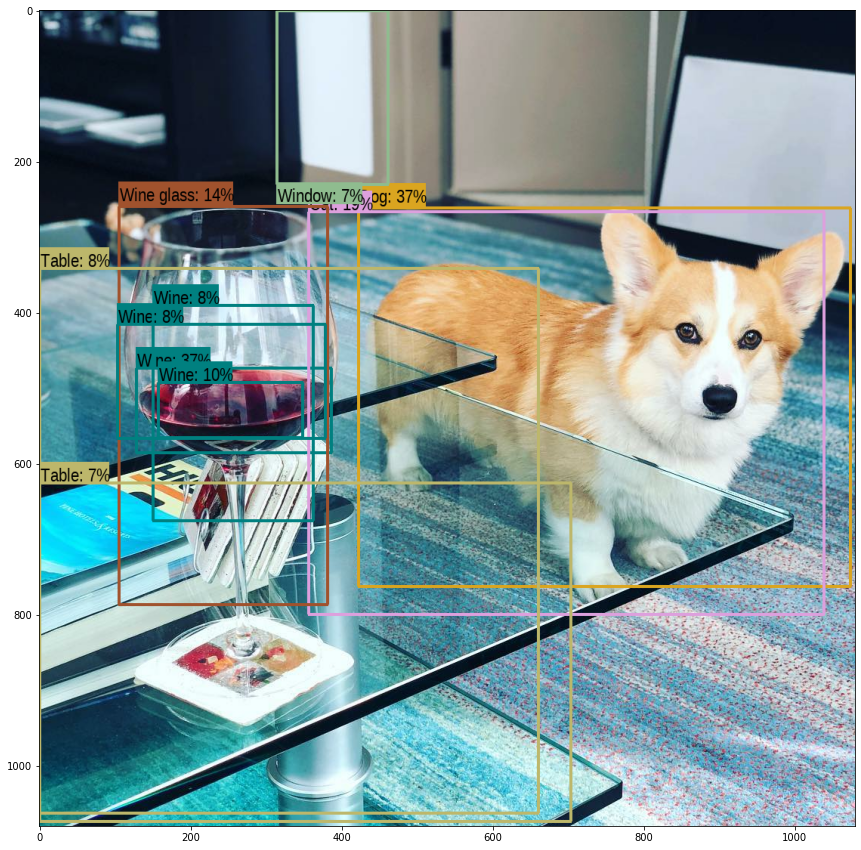

In [30]:
result_10 = run_detector(detector, List_name[0])

In [31]:
result_10

{'detection_boxes': array([[2.42767051e-01, 3.91600698e-01, 7.05704510e-01, 9.95324492e-01],
        [4.39795226e-01, 1.19425386e-01, 5.41840613e-01, 3.58662039e-01],
        [2.47751638e-01, 3.30009550e-01, 7.39999294e-01, 9.62194324e-01],
        [2.40985125e-01, 9.72319692e-02, 7.28120923e-01, 3.54306638e-01],
        [4.56620812e-01, 1.45454049e-01, 5.23614109e-01, 3.23324978e-01],
        [3.85375023e-01, 9.54213291e-02, 5.24786770e-01, 3.51014733e-01],
        [3.62589210e-01, 1.39623091e-01, 6.25724673e-01, 3.36307943e-01],
        [3.17490250e-01, 0.00000000e+00, 9.83786106e-01, 6.12612963e-01],
        [1.28789246e-03, 2.91194737e-01, 2.13288829e-01, 4.27913189e-01],
        [5.80369949e-01, 0.00000000e+00, 9.94055271e-01, 6.51886284e-01],
        [9.10502255e-01, 8.13756824e-01, 9.35864031e-01, 8.43498468e-01],
        [3.43974769e-01, 1.09005257e-01, 6.29941285e-01, 2.79161274e-01],
        [4.55633551e-01, 2.05689892e-01, 5.21286249e-01, 3.49288046e-01],
        [7.35792220